In [76]:
import numpy 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [77]:
df = pd.read_csv('nba_logreg.csv')

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         1340 non-null   object 
 1   GP           1340 non-null   int64  
 2   MIN          1340 non-null   float64
 3   PTS          1340 non-null   float64
 4   FGM          1340 non-null   float64
 5   FGA          1340 non-null   float64
 6   FG%          1340 non-null   float64
 7   3P Made      1340 non-null   float64
 8   3PA          1340 non-null   float64
 9   3P%          1329 non-null   float64
 10  FTM          1340 non-null   float64
 11  FTA          1340 non-null   float64
 12  FT%          1340 non-null   float64
 13  OREB         1340 non-null   float64
 14  DREB         1340 non-null   float64
 15  REB          1340 non-null   float64
 16  AST          1340 non-null   float64
 17  STL          1340 non-null   float64
 18  BLK          1340 non-null   float64
 19  TOV   

In [79]:
df.head()

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0


In [80]:
df.describe()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
count,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1329.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000
mean,60.414179,17.624627,6.801493,2.629104,5.885299,44.169403,0.247612,0.779179,19.308126,1.297687,1.821940,70.300299,1.009403,2.025746,3.034478,1.550522,0.618507,0.368582,1.193582,0.620149
std,17.433992,8.307964,4.357545,1.683555,3.593488,6.137679,0.383688,1.061847,16.022916,0.987246,1.322984,10.578479,0.777119,1.360008,2.057774,1.471169,0.409759,0.429049,0.722541,0.485531
min,11.000000,3.100000,0.700000,0.300000,0.800000,23.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.300000,0.000000,0.000000,0.000000,0.100000,0.000000
25%,47.000000,10.875000,3.700000,1.400000,3.300000,40.200000,0.000000,0.000000,0.000000,0.600000,0.900000,64.700000,0.400000,1.000000,1.500000,0.600000,0.300000,0.100000,0.700000,0.000000
50%,63.000000,16.100000,5.550000,2.100000,4.800000,44.100000,0.100000,0.300000,22.400000,1.000000,1.500000,71.250000,0.800000,1.700000,2.500000,1.100000,0.500000,0.200000,1.000000,1.000000
75%,77.000000,22.900000,8.800000,3.400000,7.500000,47.900000,0.400000,1.200000,32.500000,1.600000,2.300000,77.600000,1.400000,2.600000,4.000000,2.000000,0.800000,0.500000,1.500000,1.000000
max,82.000000,40.900000,28.200000,10.200000,19.800000,73.700000,2.300000,6.500000,100.000000,7.700000,10.200000,100.000000,5.300000,9.600000,13.900000,10.600000,2.500000,3.900000,4.400000,1.000000


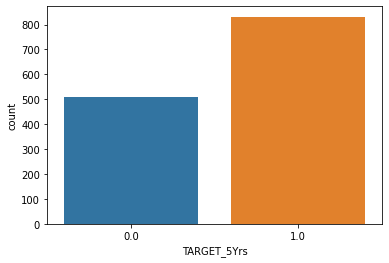

In [81]:
sns.countplot(x = df['TARGET_5Yrs'])
plt.show()

In [82]:
df['TARGET_5Yrs'].value_counts()

1.0    831
0.0    509
Name: TARGET_5Yrs, dtype: int64

In [83]:
df['3P%'].isna().sum()

11

In [84]:
df.drop(df[df['3P%'].isnull() == True].index, axis=0, inplace=True)

In [85]:
df['3P%'].isna().sum()

0

In [86]:
df.drop(['Name'], axis=1, inplace=True)

In [87]:
df

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,0.9,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,1.3,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,80,15.8,4.3,1.6,3.6,43.3,0.0,0.2,14.3,1.2,1.5,79.2,0.4,0.8,1.2,2.5,0.6,0.2,0.8,0.0
1336,68,12.6,3.9,1.5,4.1,35.8,0.1,0.7,16.7,0.8,1.0,79.4,0.4,1.1,1.5,2.3,0.8,0.0,1.3,1.0
1337,43,12.1,5.4,2.2,3.9,55.0,0.0,0.0,0.0,1.0,1.6,64.3,1.5,2.3,3.8,0.3,0.3,0.4,0.9,0.0
1338,52,12.0,4.5,1.7,3.8,43.9,0.0,0.2,10.0,1.2,1.8,62.5,0.2,0.4,0.7,2.2,0.4,0.1,0.8,1.0


In [88]:
df.rename(columns = {'TARGET_5Yrs': 'target'}, inplace=True)

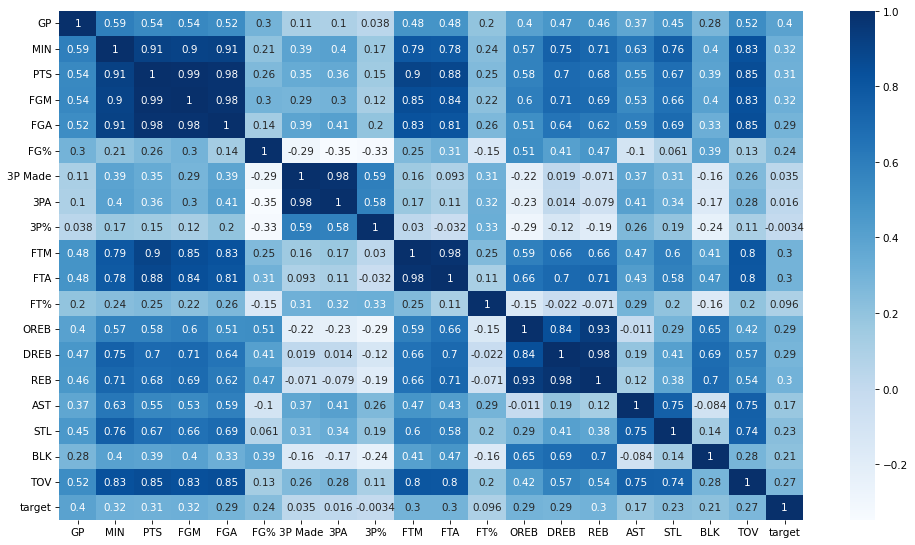

In [89]:
plt.figure(figsize=(16, 9), dpi = 75)
sns.heatmap(df.corr(), annot = True, cmap='Blues')
plt.show()

In [107]:
X_features = df.corr()['target'].sort_values()[-25:-1].index

In [108]:
X_features

Index(['3P%', '3PA', '3P Made', 'FT%', 'AST', 'BLK', 'STL', 'FG%', 'TOV',
       'DREB', 'FGA', 'OREB', 'FTM', 'FTA', 'REB', 'PTS', 'MIN', 'FGM', 'GP'],
      dtype='object')

In [109]:
import statsmodels.api as sm

In [110]:
y = df['target']
X = sm.add_constant(df)

In [111]:
X

,const,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,target
0,1.0,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,1.0,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,1.0,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,1.0,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,1.0,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,1.0,80,15.8,4.3,1.6,3.6,43.3,0.0,0.2,14.3,...,1.5,79.2,0.4,0.8,1.2,2.5,0.6,0.2,0.8,0.0
1336,1.0,68,12.6,3.9,1.5,4.1,35.8,0.1,0.7,16.7,...,1.0,79.4,0.4,1.1,1.5,2.3,0.8,0.0,1.3,1.0
1337,1.0,43,12.1,5.4,2.2,3.9,55.0,0.0,0.0,0.0,...,1.6,64.3,1.5,2.3,3.8,0.3,0.3,0.4,0.9,0.0
1338,1.0,52,12.0,4.5,1.7,3.8,43.9,0.0,0.2,10.0,...,1.8,62.5,0.2,0.4,0.7,2.2,0.4,0.1,0.8,1.0


In [112]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X[X_features], y, test_size=0.3, random_state=42)


In [113]:
logit = sm.Logit(y_train, X_train)

In [114]:
logit_model = logit.fit()

Optimization terminated successfully.
         Current function value: 0.563244
         Iterations 6


In [115]:
logit_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.155     
Dependent Variable: target           AIC:              1085.6344 
Date:               2023-01-17 11:51 BIC:              1177.5029 
No. Observations:   930              Log-Likelihood:   -523.82   
Df Model:           18               LL-Null:          -619.78   
Df Residuals:       911              LLR p-value:      4.0852e-31
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
-------------------------------------------------------------------
           Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
-------------------------------------------------------------------
3P%        0.0025     0.0061    0.4117   0.6806   -0.0094    0.0144
3PA       -0.4520     0.4700   -0.9618   0.3362   -1.3732    0.4691
3P Made    1.2866     1.5481    0.8311   0.4059   -1.7476    4.3208
FT%       -0.0162     0.0095   -1.7008   0.0890   -0.0348    0.0025
AST        0.2987     0.1288    2.3188   0.0204    0.0462    0.5511
BLK        0.5578     0.3112    1.7923   0.0731   -0.0522    1.1677
STL       -0.0425     0.3732   -0.1140   0.9092   -0.7740    0.6889
FG%       -0.0209     0.0150   -1.3945   0.1632   -0.0503    0.0085
TOV       -0.0555     0.3145   -0.1766   0.8598   -0.6719    0.5608
DREB      -1.3322     1.5142   -0.8798   0.3790   -4.3000    1.6356
FGA       -0.3697     0.2105   -1.7561   0.0791   -0.7824    0.0429
OREB       0.0885     1.5197    0.0582   0.9536   -2.8901    3.0671
FTM        0.9161     1.2216    0.7499   0.4533   -1.4782    3.3104
FTA       -1.2289     0.5235   -2.3473   0.0189   -2.2550   -0.2028
REB        1.1092     1.5103    0.7344   0.4627   -1.8509    4.0693
PTS        0.6638     1.0190    0.6514   0.5148   -1.3334    2.6609
MIN       -0.0734     0.0387   -1.8959   0.0580   -0.1492    0.0025
FGM       -0.2180     2.0589   -0.1059   0.9157   -4.2534    3.8173
GP         0.0321     0.0056    5.7345   0.0000    0.0211    0.0430
=================================================================

"""

In [118]:
def get_significant_vars( lm ):
    var_p_vals_df = pd.DataFrame( lm.pvalues )
    var_p_vals_df['vars'] = var_p_vals_df.index
    var_p_vals_df.columns = ['pvals', 'vars']
    return list( var_p_vals_df[var_p_vals_df.pvals <= 0.05]['vars'])

In [129]:
sign_vars = get_significant_vars( logit_model )
sign_vars

['AST', 'FTA', 'GP']

In [134]:
final_model = sm.Logit(y_train, sm.add_constant(X_train[sign_vars])).fit()
final_model.summary2()

Optimization terminated successfully.
         Current function value: 0.583221
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.125     
Dependent Variable: target           AIC:              1092.7910 
Date:               2023-01-17 11:59 BIC:              1112.1318 
No. Observations:   930              Log-Likelihood:   -542.40   
Df Model:           3                LL-Null:          -619.78   
Df Residuals:       926              LLR p-value:      2.4573e-33
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
-------------------------------------------------------------------
           Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
-------------------------------------------------------------------
const     -2.3335     0.2693   -8.6645   0.0000   -2.8614   -1.8057
AST       -0.0091     0.0585   -0.1561   0.8760   -0.1238    0.1055
FTA        0.3167     0.0812    3.9021   0.0001    0.1576    0.4758
GP         0.0385     0.0050    7.6426   0.0000    0.0286    0.0484
=================================================================

"""

In [135]:
y_pred = final_model.predict(sm.add_constant(X_test[sign_vars]))

In [140]:
y_pred = y_pred.map( lambda x: 1 if x > 0.5 else 0)

In [143]:
y_pred


Int64Index([ 904,  115,  536,  175,   63, 1145, 1102,  799,  286,  342,
            ...
            1107, 1014,  332,  359,  138,  385,  292, 1094,  562,  141],
           dtype='int64', length=399)

In [144]:
y_test

904     1.0
115     1.0
536     1.0
175     1.0
63      1.0
       ... 
385     0.0
292     1.0
1094    1.0
562     0.0
141     0.0
Name: target, Length: 399, dtype: float64

In [136]:
from sklearn.metrics import confusion_matrix, classification_report

In [145]:
confusion_matrix(y_test, y_pred)

array([[ 82,  63],
       [ 47, 207]], dtype=int64)

In [146]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.57      0.64      0.60       129
           1       0.81      0.77      0.79       270

    accuracy                           0.72       399
   macro avg       0.69      0.70      0.69       399
weighted avg       0.73      0.72      0.73       399



In [ ]:
mm mm 